### Import Libraries

In [20]:
#basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#modelling libraries
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Import Data

In [22]:
#training data
X_train_resampled = pd.read_csv('./X_train_resampled.csv')
y_train_resampled = pd.read_csv('./y_train_resampled.csv')

#test data
X_test_final = pd.read_csv('./X_test_final.csv')
y_test = pd.read_csv('./y_test.csv')

#training data before resampled
X_train_final = pd.read_csv('./X_train_final.csv')
y_train = pd.read_csv('./y_train_final.csv')

### Basic Model

#### Logistic Regression

In [29]:
#model fitting
lr = LogisticRegression()
lr.fit(X_train_resampled, y_train_resampled)

#predict values
lr_pred = lr.predict(X_test_final)

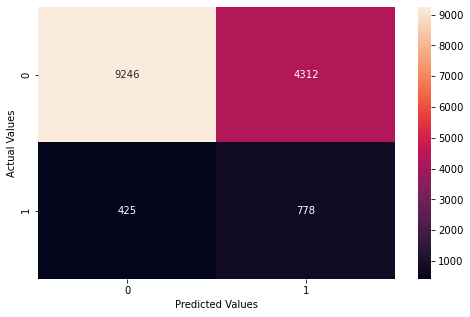

In [30]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='.0f', ax=ax)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [31]:
print(classification_report(y_test, lr_pred))
print("ROC_AUC_Score", roc_auc_score(y_test, lr_pred))
print("Model Score (Train data)", lr.score(X_train_resampled, y_train_resampled))
print("Model Score (Test data)", lr.score(X_test_final, y_test))

              precision    recall  f1-score   support

           0       0.96      0.68      0.80     13558
           1       0.15      0.65      0.25      1203

    accuracy                           0.68     14761
   macro avg       0.55      0.66      0.52     14761
weighted avg       0.89      0.68      0.75     14761

ROC_AUC_Score 0.6643377664900049
Model Score (Train data) 0.6743110340679945
Model Score (Test data) 0.6790867827382968


#### KNnearestNeighborClassifier

In [6]:
#model fitting
knn = KNeighborsClassifier()
knn.fit(X_train_resampled, y_train_resampled)

#predict values
knn_pred = knn.predict(X_test_final)

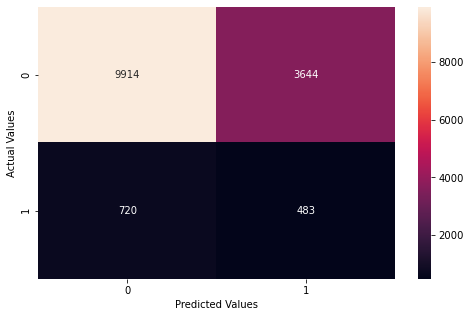

In [7]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt='.0f', ax=ax)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [8]:
print(classification_report(y_test, knn_pred))
print("ROC_AUC_Score", roc_auc_score(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.93      0.73      0.82     13558
           1       0.12      0.40      0.18      1203

    accuracy                           0.70     14761
   macro avg       0.52      0.57      0.50     14761
weighted avg       0.87      0.70      0.77     14761

ROC_AUC_Score 0.5663625270795574


#### XGBClasifier

In [9]:
#model fitting
xgb = XGBClassifier()
xgb.fit(X_train_resampled, y_train_resampled)

#predict values
xgb_pred = xgb.predict(X_test_final)

[17:38:45] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


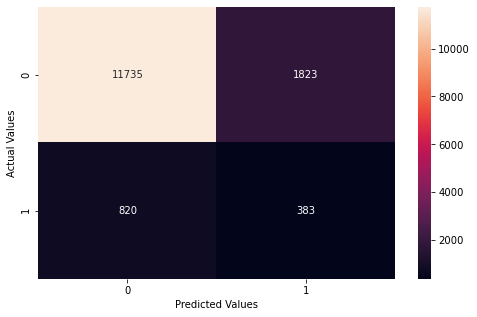

In [10]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, fmt='.0f', ax=ax)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [11]:
print(classification_report(y_test, xgb_pred))
print("ROC_AUC_Score", roc_auc_score(y_test, xgb_pred))
print("Model Score (Train data)", xgb.score(X_train_resampled, y_train_resampled))
print("Model Score (Test data)", xgb.score(X_test_final, y_test))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90     13558
           1       0.17      0.32      0.22      1203

    accuracy                           0.82     14761
   macro avg       0.55      0.59      0.56     14761
weighted avg       0.87      0.82      0.84     14761

ROC_AUC_Score 0.5919556900147722
Model Score (Train data) 0.8862277567481516
Model Score (Test data) 0.8209470903055348


#### RandomForestClassifier

In [13]:
#model fitting
rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)

#predict values
rf_pred = rf.predict(X_test_final)

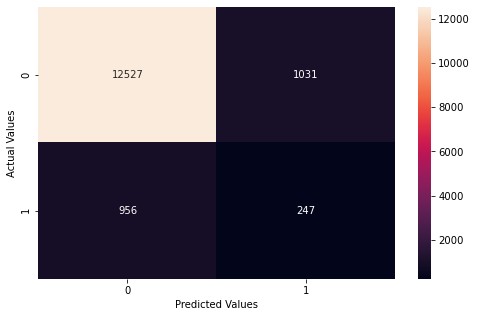

In [14]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test,rf_pred), annot=True, fmt='.0f', ax=ax)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [15]:
print(classification_report(y_test, rf_pred))
print("ROC_AUC_Score", roc_auc_score(y_test, rf_pred))
print("Model Score (Train data)", rf.score(X_train_resampled, y_train_resampled))
print("Model Score (Test data)", rf.score(X_test_final, y_test))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     13558
           1       0.19      0.21      0.20      1203

    accuracy                           0.87     14761
   macro avg       0.56      0.56      0.56     14761
weighted avg       0.87      0.87      0.87     14761

ROC_AUC_Score 0.5646381844964714
Model Score (Train data) 1.0
Model Score (Test data) 0.8653885238127498


### Tuned Model

#### Logistic Regression

The LogisticRegression machine learning algorithm does not have a parameter that is significant enough to make the machine learning model perform better, but it might change a little. 

In making this machine learning model, I will not try tuning LogisticRegression because the results will not change much and also based on the results of the basic model, the accuracy of this model is far below other models.

#### KNeighborsClassifier

The KNeighborsClassifier algorithm is the same. Although there are neighboring parameters that might improve the performance of the machine learning model created, the accuracy and f1-score values ​​are far below the other two models, so I decided not to tune this algorithm.

#### XGBClassifier

In [37]:
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.59),
              'subsample': stats.uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }

#define model
xgb = XGBClassifier()
RANDOM_xgb = RandomizedSearchCV(xgb, 
                         param_distributions = param_dist,
                         cv = 3,
                         scoring = 'roc_auc', 
                         verbose = 3, 
                         n_jobs = -1)

#model fitting
RANDOM_xgb.fit(X_train_resampled, y_train_resampled)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  30 | elapsed:  6.1min remaining:  4.1min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  8.5min finished


[18:43:10] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                   param_distributions={'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000245B3E3C0D0>,
                                        'lear

In [38]:
print(RANDOM_xgb.best_params_)

#predict
tuned_xgb_pred = RANDOM_xgb.predict(X_test_final)

{'colsample_bytree': 0.6252336567550457, 'learning_rate': 0.35192718845299137, 'max_depth': 8, 'min_child_weight': 2, 'n_estimators': 382, 'subsample': 0.5699195758248161}


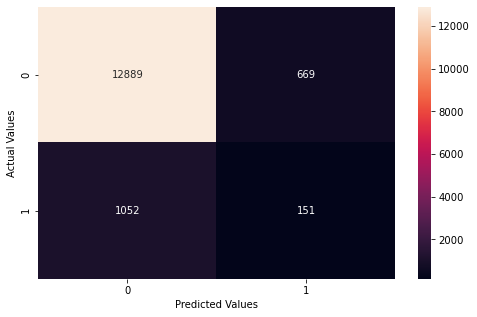

In [39]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test,tuned_xgb_pred), annot=True, fmt='.0f', ax=ax)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [40]:
print(classification_report(y_test, tuned_xgb_pred))
print("ROC_AUC_Score", roc_auc_score(y_test, tuned_xgb_pred))
print("Model Score (Train data)", RANDOM_xgb.score(X_train_resampled, y_train_resampled))
print("Model Score (Test data)", RANDOM_xgb.score(X_test_final, y_test))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     13558
           1       0.18      0.13      0.15      1203

    accuracy                           0.88     14761
   macro avg       0.55      0.54      0.54     14761
weighted avg       0.86      0.88      0.87     14761

ROC_AUC_Score 0.5380879867499466
Model Score (Train data) 0.9996259897813817
Model Score (Test data) 0.6437745619724108


#### RandomForestClassifier

In [41]:
max_depth = [10, 30, 50, 70, 90, 100]
min_samples_leaf = [1, 2, 4]
min_samples_split = [2, 5, 10]
n_estimators = [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

param = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

#define model
rf = RandomForestClassifier()
Random_RF = RandomizedSearchCV(estimator = rf, param_distributions = param, scoring = 'roc_auc', cv = 3, verbose = 3)

#model fitting
Random_RF.fit(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_depth=30 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_depth=30, score=0.968, total= 2.3min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_depth=30 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_depth=30, score=0.980, total= 2.1min
[CV] n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_depth=30 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.4min remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=2, min_samples_leaf=1, max_depth=30, score=0.980, total= 2.2min
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_depth=90, score=0.957, total= 1.1min
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_depth=90, score=0.972, total= 1.1min
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_depth=90 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=1, max_depth=90, score=0.972, total= 1.1min
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_depth=90, score=0.951, total= 9.7min
[CV] n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_depth=90 
[CV]  n_estimators=1800, min_samples_split=5, min_samples_leaf=4, max_d

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 136.6min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [10, 30, 50, 70, 90, 100],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   scoring='roc_auc', verbose=3)

In [44]:
print(Random_RF.best_params_)

#predict
tuned_RF_pred = Random_RF.predict(X_test_final)

{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}


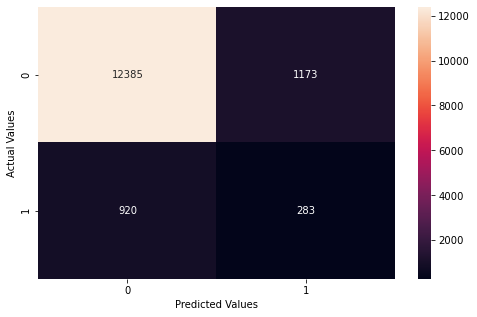

In [45]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test,tuned_RF_pred), annot=True, fmt='.0f', ax=ax)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [48]:
print(classification_report(y_test, tuned_RF_pred))
print("ROC_AUC_Score", roc_auc_score(y_test, tuned_RF_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     13558
           1       0.19      0.24      0.21      1203

    accuracy                           0.86     14761
   macro avg       0.56      0.57      0.57     14761
weighted avg       0.87      0.86      0.86     14761

ROC_AUC_Score 0.5743640174285239
Model Score (Train data) 0.9999996467562287
Model Score (Test data) 0.6891532907417742


In [47]:
print("Model Score (Train data)", Random_RF.score(X_train_resampled, y_train_resampled))
print("Model Score (Test data)", Random_RF.score(X_test_final, y_test))

Model Score (Train data) 0.9999996467562287
Model Score (Test data) 0.6891532907417742


### **Conclusion**

Based on the basic model, machine learning models that have high accuracy values, F1, ROC_AUC and precision are XGBClassifier and RandomForestClassifier models, while the other two models are far below.

Based on the tuning results, the XGBClassifier model experienced a significant increase in accuracy but the ROC_AUC value decreased. Meanwhile, the RandomForestClassifier model experienced an increasing ROC_AUC value and the other values ​​were relatively the same.

So it can be concluded that the **RandomForestClassifier** model that has been tuned is the best model that can be obtained.

*The model obtained is still far from perfect, so there are still many ways that can be done to improve the performance of the model, such as the undersampling technique that has not been tried, more feature engineering, more thorough feature selection, and improvement in handling lost values.*